# Дектораторы

В этом домашнем задании мы напишем собственные дектораторы, которые будут менять системные объекты. Но для начала мы с вами познакомимся с функцией `write`.

In [1]:
import sys

sys.stdout.write('Hello, my friend!')

Hello, my friend!

Это метод объектов file-like классов, то есть классов, которые реализуют семантику "Меня можно создать, из меня можно прочитать и в меня можно записать".

Самый главный пример такого объекта -- объект `file`, являющийся результатом вызова фукнции `open()`. Для простоты и универсальности взаимодействия, стандартный ввод и стандартный вывод тоже являются файлами, из которых можно читать и в которые можно писать.

## Задача 1

Для начала, давайте подменим метод `write` у объекта `sys.stdin` на такую функцию, которая перед каждым вызовом оригинальной функции записи данных в `stdout` допечатывает к тексту текущую метку времени.

In [2]:
from datetime import datetime
original_write = sys.stdout.write

In [45]:
def my_write(string_text):
    if string_text != '\n':
      original_write(f"[{datetime.now().strftime('%Y-%m-%d %H:%m:%S')}]: {string_text}")

sys.stdout.write = my_write

In [46]:
print('1, 2, 3')

[2023-12-11 15:12:00]: 1, 2, 3

In [47]:
sys.stdout.write = original_write

Вывод должен был бы быть примерно таким:

```
[2021-12-05 12:00:00]: 1, 2, 3
```

## Задача 2

Упакуйте только что написанный код в декторатор. Весь вывод фукнции должен быть помечен временными метками так, как видно выше.

In [81]:
def timed_output(function):
    def wrapper(*args):
      print(f"[{datetime.now().strftime('%Y-%m-%d %H:%m:%S')}]:", end=' ')
      function(*args)
    return wrapper

In [82]:
@timed_output
def print_greeting(name):
    print(f'Hello, {name}!')

In [83]:
print_greeting("Nikita")

[2023-12-11 16:12:31]: Hello, Nikita!


Вывод должен быть похож на следующий:

```
[2021-12-05 12:00:00]: Hello, Nikita!
```

## Задача 3

Напишите декторатор, который будет перенаправлять вывод фукнции в файл.

Подсказка: вы можете заменить объект sys.stdout каким-нибудь другим объектом.

In [169]:
sys.stdout.write = original_write

In [170]:
def redirect_output(filepath):
    def decorator(func):
      file = open(filepath, 'w')
      def wrapper():
        sys.stdout.write = file.write
        func()
      return wrapper
    return decorator

In [171]:
@redirect_output('/content/function_output.txt')
def calculate():
    for power in range(1, 5):
        for num in range(1, 20):
            print(num ** power, end=' ')
        print()

In [172]:
calculate()

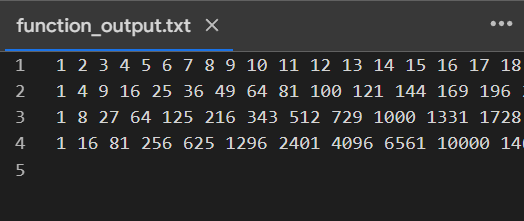
